In [1]:
import pandas as pd
import numpy as np

In [3]:
import math

1 задача

In [89]:
# x = 3.14
# n = 10
x = float(input())
n = int(input())
summ = 0
for i in range(n):
    summ += x ** i / math.factorial(i)
    print(abs(np.e ** x - summ))

 3.14
 10


22.10386685872218
18.96386685872218
14.03406685872218
8.874209525388846
4.823721518722177
2.2800150505355106
0.9488086655178201
0.35166751566702814
0.11728961435059304
0.03551776878019197


2 задача

In [20]:
data = pd.read_csv('metacritic_games.csv')

In [21]:
data.head()

,game,platform,developer,genre,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score,developer_count
0,Portal 2,PC,Valve Software,Action,E10+,2011,51,1,0,1700,107,19,95,90,3
1,Dota 2,PC,Valve Software,General,NaN,2013,32,1,0,1784,118,1674,90,65,3
2,Artifact,PC,Valve Software,Strategy,NaN,2018,13,6,1,35,4,129,76,21,3
3,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,Role-Playing,M,2011,32,0,0,1616,322,451,94,82,19
4,The Elder Scrolls V: Skyrim - Dawnguard,PC,Bethesda Game Studios,Role-Playing,M,2012,3,7,0,23,27,10,66,69,19


In [22]:
data = data[data.rating.notna()]

In [23]:
data.columns

Index(['game', 'platform', 'developer', 'genre', 'rating', 'release_date',
       'positive_critics', 'neutral_critics', 'negative_critics',
       'positive_users', 'neutral_users', 'negative_users', 'metascore',
       'user_score', 'developer_count'],
      dtype='object')

In [24]:
data['all_critics'] = data[[i for i in data.columns if 'critics' in i]].sum(axis=1)

In [25]:
data[data.game.str.contains('The Elder Scrolls')].shape[0]

15

In [26]:
years = data.groupby('release_date').count().negative_critics

In [27]:
years.idxmax()

2018

In [28]:
data.genre.value_counts().idxmax()

'Action'

3 задача

In [29]:
data['is_Action'] = data.genre.apply(lambda x: 1 if x == 'Action' else 0)

In [31]:
data.drop(['game', 'genre', 'developer', 'release_date'], axis=1, inplace=True)

In [35]:
cat_cols = pd.get_dummies(data[['platform', 'rating']], drop_first=True)

In [40]:
X = pd.concat([data.drop(['platform', 'rating', 'is_Action'], axis=1), cat_cols], axis=1)

In [42]:
y = data.is_Action

In [43]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15, train_size=0.8)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn_cl = KNeighborsClassifier(n_neighbors=10)

In [54]:
knn_cl.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [55]:
from sklearn.metrics import roc_auc_score

In [58]:
roc_auc_score(y_test, knn_cl.predict_proba(X_test)[:, -1])

0.5446217292377702

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
mm = MinMaxScaler()

In [63]:
X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

In [64]:
knn_cl.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [65]:
roc_auc_score(y_test, knn_cl.predict_proba(X_test)[:, -1])

0.6186433447098977

стало чуть больше

4 задача

In [66]:
data = pd.read_csv('diamonds.csv')

In [69]:
observed_z = (np.mean(data.price) - 3000) / np.std(data.price, ddof=1)

In [70]:
observed_z

0.23381722325417645

In [88]:
from scipy.stats import norm
value = norm.ppf(1 - 0.1 / 2)
print('critical value z-statistics', value)

critical value z-statistics 1.6448536269514722


не отвергаем нулевую гипотезу.

In [17]:
data.groupby('color').price.mean()

color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64

In [18]:
boot_list = []
for _ in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby('color').price.mean()
    boot_list.append(boot_mean)

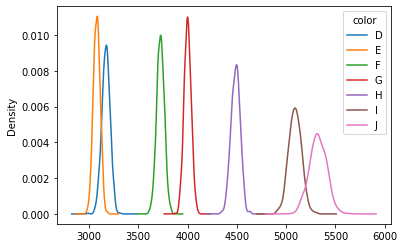

In [19]:
pd.DataFrame(boot_list).plot.kde()

бесспортно, есть связь. Чем цвет дальше по алфавиту, тем выше цена (кроме первых двух).